In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
from zipfile import ZipFile
file_name = "/content/gdrive/MyDrive/Colab Notebooks/hbc/hotel.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


**Preprocessing**

In [3]:

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display_html
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [4]:
h1 = pd.read_csv('/content/H1.csv')
h2 = pd.read_csv('/content/H2.csv')

In [5]:
h1.loc[:, 'id'] = range(1, len(h1) + 1)

start = h1['id'].max() + 1
stop = start + len(h2)
h2.loc[:, 'id'] = range(start, stop)

In [6]:
df = pd.concat([h1, h2], ignore_index=True, sort=False)

In [7]:
df.columns[:3]

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear'], dtype='object')

In [8]:
#converting it to snake_case
def convert(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

In [9]:
columns = [convert(col) for col in df.columns]
print(df.columns)
df.columns = columns
print(columns);

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'id'],
      dtype='object')
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings

In [10]:
df.shape
# rows and cols

(119390, 32)

In [11]:
#attributes
df.loc[0]

is_canceled                                      0
lead_time                                      342
arrival_date_year                             2015
arrival_date_month                            July
arrival_date_week_number                        27
arrival_date_day_of_month                        1
stays_in_weekend_nights                          0
stays_in_week_nights                             0
adults                                           2
children                                       0.0
babies                                           0
meal                                     BB       
country                                        PRT
market_segment                              Direct
distribution_channel                        Direct
is_repeated_guest                                0
previous_cancellations                           0
previous_bookings_not_canceled                   0
reserved_room_type                C               
assigned_room_type             

In [12]:
df.head(20)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id
0,0,342,2015,July,27,1,0,0,2,0.0,...,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01,1
1,0,737,2015,July,27,1,0,0,2,0.0,...,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01,2
2,0,7,2015,July,27,1,0,1,1,0.0,...,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,3
3,0,13,2015,July,27,1,0,1,1,0.0,...,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,4
4,0,14,2015,July,27,1,0,2,2,0.0,...,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03,5
5,0,14,2015,July,27,1,0,2,2,0.0,...,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03,6
6,0,0,2015,July,27,1,0,2,2,0.0,...,NULL,NULL,0,Transient,107.00,0,0,Check-Out,2015-07-03,7
7,0,9,2015,July,27,1,0,2,2,0.0,...,303,NULL,0,Transient,103.00,0,1,Check-Out,2015-07-03,8
8,1,85,2015,July,27,1,0,3,2,0.0,...,240,NULL,0,Transient,82.00,0,1,Canceled,2015-05-06,9
9,1,75,2015,July,27,1,0,3,2,0.0,...,15,NULL,0,Transient,105.50,0,0,Canceled,2015-04-22,10


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  object 
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.00,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.00,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.00,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.00,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.00,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.00,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.00,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.00,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.00,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.00,10.0


In [15]:
df.meal.unique()
# undefined/SC - No meal package
# BB - Bed and Breakfast
# HB = Half board (Breakfast and one other meal – usually dinner)
# FB = Full board (Breakfast, lunch and dinner)

array(['BB       ', 'FB       ', 'HB       ', 'SC       ', 'Undefined'],
      dtype=object)

In [16]:
df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [17]:
df.customer_type.unique()
# Contract: When the booking has an allotment or other type of contract associated to it
# Group: When the booking is associated to a group
# Transient: When the booking is not part of a group or contract, and is not associated to other transient booking
# Transient-party: When the booking is transient, but is associated to at least other transient booking

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [18]:
#convert null or undefined string value to np.nan
for col in df.columns:
    if df[col].dtype == 'object' and col != 'country':
        df.loc[df[col].str.contains('NULL'), col] = np.nan
        df.loc[df[col].str.contains('Undefined', na=False), col] = np.nan

In [19]:
df.isnull().sum()

is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                1169
country                              488
market_segment                         2
distribution_channel                   5
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_

In [20]:
#Delete Some missing values
subset = [
    'country', 
    'children', 
    'market_segment', 
    'distribution_channel',
]
df = df.dropna(subset=subset)

In [21]:
#some missing value may not be useful , so inserting some dummy value
df.loc[df.agent.isnull(), 'agent'] = 999
df.loc[df.company.isnull(), 'company'] = 999
df.loc[df.meal.isnull(), 'meal'] = 'SC'

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118897.0,0.371355,0.483169,0.00,0.0,0.0,1.0,1.0
lead_time,118897.0,104.311446,106.903759,0.00,18.0,69.0,161.0,737.0
arrival_date_year,118897.0,2016.157666,0.707454,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,118897.0,27.166548,13.590028,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118897.0,15.800971,8.780305,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118897.0,0.928888,0.996215,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,118897.0,2.502141,1.900175,0.00,1.0,2.0,3.0,41.0
adults,118897.0,1.858390,0.578578,0.00,2.0,2.0,2.0,55.0
children,118897.0,0.104199,0.399166,0.00,0.0,0.0,0.0,10.0
babies,118897.0,0.007948,0.097381,0.00,0.0,0.0,0.0,10.0


In [23]:
# ADR field refers to the average price per night of the reservation. 
#Therefore, it is not normal for it to take a value smaller than zero. 
#After using df.describe().T to see such situations. We delete values that are smaller than zero for the ADR field.
df = df[df.adr > 0]

In [24]:
df[["meal", "reserved_room_type", "market_segment", "reservation_status","agent","company"]] = \
df[["meal", "reserved_room_type", "market_segment", "reservation_status","agent","company"]].astype("category")

In [25]:
cat_columns = df.describe(include="category").columns
cat_columns

Index(['meal', 'market_segment', 'reserved_room_type', 'agent', 'company',
       'reservation_status'],
      dtype='object')

In [26]:
for i in cat_columns:
    print("unique values in", i, "are:")
    print(df[i].value_counts())
    print("*"*50)

unique values in meal are:
BB           90376
HB           14232
SC           10440
SC            1128
FB             782
Name: meal, dtype: int64
**************************************************
unique values in market_segment are:
Online TA        56036
Offline TA/TO    23830
Groups           19554
Direct           12209
Corporate         5035
Aviation           231
Complementary       63
Name: market_segment, dtype: int64
**************************************************
unique values in reserved_room_type are:
A                   84189
D                   18977
E                    6385
F                    2817
G                    1995
B                    1081
C                     913
H                     595
L                       6
Name: reserved_room_type, dtype: int64
**************************************************
unique values in agent are:
          9    31856
999            15073
        240    13737
          1     7078
         14     3619
               ...  

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,116958.0,0.375776,0.484325,0.00,0.00,0.0,1.00,1.0
lead_time,116958.0,105.376297,106.944554,0.00,19.00,71.0,162.00,709.0
arrival_date_year,116958.0,2016.161451,0.706501,2015.00,2016.00,2016.0,2017.00,2017.0
arrival_date_week_number,116958.0,27.137981,13.561225,1.00,16.00,27.0,38.00,53.0
arrival_date_day_of_month,116958.0,15.805221,8.783034,1.00,8.00,16.0,23.00,31.0
stays_in_weekend_nights,116958.0,0.937670,0.993328,0.00,0.00,1.0,2.00,16.0
stays_in_week_nights,116958.0,2.522957,1.885579,0.00,1.00,2.0,3.00,41.0
adults,116958.0,1.862438,0.481129,0.00,2.00,2.0,2.00,4.0
children,116958.0,0.104815,0.400288,0.00,0.00,0.0,0.00,10.0
babies,116958.0,0.007866,0.097102,0.00,0.00,0.0,0.00,10.0


In [28]:
#outlier detection

In [29]:
#InterQuartile Rule

cleaned = df.copy()

columns = [
    'lead_time',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'adr',
]

for col in columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    print(f'Lower point: {round(lower, 2)} \t upper point: {round(upper, 2)} \t {col}')
    
    if lower == upper:
        continue
    
    cond1 = (cleaned[col] >= lower) & (cleaned[col] <= upper)
    cond2 = cleaned[col].isnull()
    cleaned = cleaned[cond1 | cond2]

Lower point: -195.5 	 upper point: 376.5 	 lead_time
Lower point: -3.0 	 upper point: 5.0 	 stays_in_weekend_nights
Lower point: -2.0 	 upper point: 6.0 	 stays_in_week_nights
Lower point: 2.0 	 upper point: 2.0 	 adults
Lower point: 0.0 	 upper point: 0.0 	 children
Lower point: 0.0 	 upper point: 0.0 	 babies
Lower point: -11.5 	 upper point: 208.5 	 adr


In [30]:
cleaned[columns].describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,106723.0,96.088406,92.822540,0.0,18.0,67.0,152.00,374.0
stays_in_weekend_nights,106723.0,0.865062,0.870129,0.0,0.0,1.0,2.00,4.0
stays_in_week_nights,106723.0,2.318029,1.415296,0.0,1.0,2.0,3.00,6.0
adults,106723.0,1.848083,0.482426,0.0,2.0,2.0,2.00,4.0
children,106723.0,0.083815,0.350265,0.0,0.0,0.0,0.00,3.0
babies,106723.0,0.007534,0.095824,0.0,0.0,0.0,0.00,10.0
adr,106723.0,99.155196,38.421950,1.0,71.1,94.8,123.14,208.5


In [31]:
# Multivariate Anomaly Detection
  # Some observations may not be outlier when alone
  # However, when combined with another variable, outlier values may occur
  # For example, with the price - nights

In [32]:
# thats not important, just for visualization
def display_side_by_side(*args):
    html_str = ''
    
    for df in args:
        html_str += df.to_html()
        
    display_html(html_str.replace('table', 'table style="display:inline"'), raw=True)

In [33]:
cleaned.loc[:, 'total_nights'] = cleaned['stays_in_week_nights'] + cleaned['stays_in_weekend_nights']
cleaned.loc[:, 'price'] = cleaned['adr'] * cleaned['total_nights']

In [34]:
cols = ['total_nights', 'price']

In [35]:
# convert to numpy array, because local outlier method want this
X = np.array(cleaned[cols])

In [36]:
#Elliptice Envelope

# create model
ee = EllipticEnvelope(contamination=.01, random_state=0)

In [37]:
# predictions
y_pred_ee = ee.fit_predict(X)

In [38]:
# predictions (-1: outlier, 1: normal)
anomalies = X[y_pred_ee == -1]

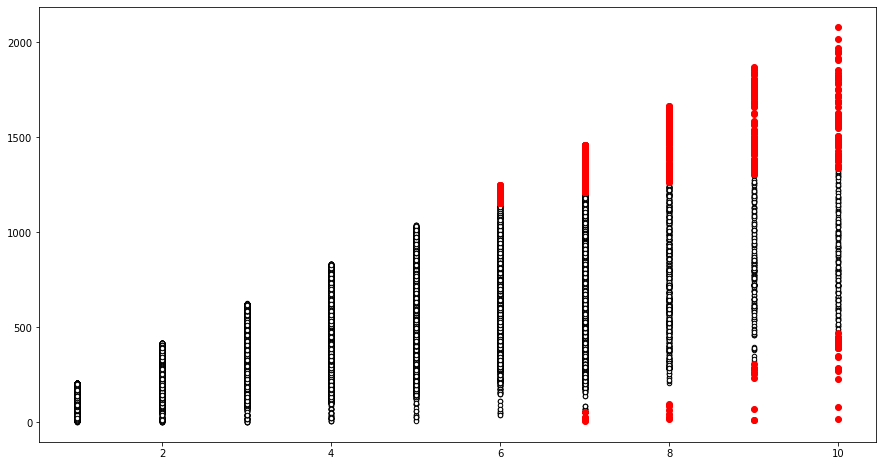

In [39]:
# plot data and outliers
plt.figure(figsize=(15, 8))
plt.scatter(X[:, 0], X[:, 1], c='white', s=20, edgecolor='k')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red');

In [40]:
# statistics of outlier observations
outliers = cleaned[y_pred_ee == -1][cols].groupby(cols[0]).agg({cols[1]: ['min', 'max', 'mean', 'std', 'median']})

In [41]:
# statistics of all observations
all_data = cleaned[cols].groupby(cols[0]).agg({cols[1]: ['min', 'max', 'mean', 'std', 'median']})

In [42]:
# statistics of cleaned data
clean_data = cleaned[y_pred_ee != -1].groupby(cols[0]).agg({cols[1]: ['min', 'max', 'mean', 'std', 'median']})

In [43]:
display_side_by_side(all_data, outliers, clean_data)

price 
 
 
 
 min 
 max 
 mean 
 std 
 median 
 
 
 total_nights 
 
 
 
 
 
 
 
 
 
 1 
 1.00 
 208.00 
 93.551632 
 40.041280 
 89.000 
 
 
 2 
 2.00 
 417.00 
 193.363506 
 71.809371 
 187.200 
 
 
 3 
 3.00 
 624.99 
 307.502708 
 108.518262 
 291.600 
 
 
 4 
 4.00 
 834.00 
 402.891749 
 149.940802 
 384.200 
 
 
 5 
 8.00 
 1040.00 
 528.015487 
 196.280852 
 501.500 
 
 
 6 
 36.00 
 1249.02 
 655.874750 
 249.239448 
 635.550 
 
 
 7 
 9.03 
 1459.36 
 666.379208 
 305.362646 
 598.500 
 
 
 8 
 16.00 
 1664.16 
 832.900760 
 362.480690 
 795.600 
 
 
 9 
 14.04 
 1867.50 
 1002.631601 
 409.619361 
 909.765 
 
 
 10 
 18.00 
 2082.00 
 993.092523 
 418.914945 
 921.000 
 
 
 
 
 
 
 price 
 
 
 
 min 
 max 
 mean 
 std 
 median 
 
 
 total_nights 
 
 
 
 
 
 
 
 
 
 6 
 1152.00 
 1249.02 
 1196.127231 
 28.867197 
 1193.04 
 
 
 7 
 9.03 
 1459.36 
 1314.514600 
 142.000417 
 1320.48 
 
 
 8 
 16.00 
 1664.16 
 1400.684800 
 299.490422 
 1450.00 
 
 
 9 
 14.04 
 1867.50 
 1413.963679 
 445.921108 
 1480.50 
 
 
 10 
 18.00 
 2082.00 
 1267.973000 
 584.023093 
 1474.75 
 
 
 
 
 
 
 price 
 
 
 
 min 
 max 
 mean 
 std 
 median 
 
 
 total_nights 
 
 
 
 
 
 
 
 
 
 1 
 1.0 
 208.00 
 93.551632 
 40.041280 
 89.00 
 
 
 2 
 2.0 
 417.00 
 193.363506 
 71.809371 
 187.20 
 
 
 3 
 3.0 
 624.99 
 307.502708 
 108.518262 
 291.60 
 
 
 4 
 4.0 
 834.00 
 402.891749 
 149.940802 
 384.20 
 
 
 5 
 8.0 
 1040.00 
 528.015487 
 196.280852 
 501.50 
 
 
 6 
 36.0 
 1150.02 
 634.897204 
 229.617591 
 621.00 
 
 
 7 
 56.0 
 1210.02 
 618.868283 
 256.030785 
 573.02 
 
 
 8 
 208.8 
 1260.88 
 738.479911 
 275.387665 
 720.00 
 
 
 9 
 324.0 
 1296.00 
 828.226800 
 229.781849 
 801.90 
 
 
 10 
 480.0 
 1322.40 
 868.712217 
 227.781794 
 840.00

In [44]:
df_cleaned = cleaned[y_pred_ee != -1].copy()

In [45]:
h1_cleaned = df_cleaned[df_cleaned.id.isin(h1.id.tolist())]
h2_cleaned = df_cleaned[df_cleaned.id.isin(h2.id.tolist())]

h1_cleaned = h1_cleaned.drop('id', axis=1)
h2_cleaned = h2_cleaned.drop('id', axis=1)

In [46]:
h1_cleaned.to_csv('/content/gdrive/MyDrive/Colab Notebooks/hbc/H1_cleaned.csv', index=False)
h2_cleaned.to_csv('/content/gdrive/MyDrive/Colab Notebooks/hbc/H2_cleaned.csv', index=False)